# WildGuardMix Dataset Analysis

This notebook explores the `allenai/wildguardmix` dataset from HuggingFace.

Dataset: https://huggingface.co/datasets/allenai/wildguardmix

## 1. Load Environment Variables and Import Libraries

In [1]:
# Import libraries
import intention_jailbreak
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Load the WildGuardMix Dataset

In [ ]:
# Load the dataset from HuggingFace
print("Loading WildGuardMix dataset...")
dataset = load_dataset("allenai/wildguardmix", 'wildguardtrain')
print(f"\nDataset object: {dataset}")

Loading WildGuardMix dataset...


train/wildguard_train.parquet:   0%|          | 0.00/53.7M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/86759 [00:00<?, ? examples/s]

Dataset loaded successfully!

Dataset object: DatasetDict({
    train: Dataset({
        features: ['prompt', 'adversarial', 'response', 'prompt_harm_label', 'response_refusal_label', 'response_harm_label', 'subcategory'],
        num_rows: 86759
    })
})


## 3. Dataset Structure and Basic Information

In [4]:
# Display dataset splits and sizes
print("Dataset Splits:")
for split_name in dataset.keys():
    split_size = len(dataset[split_name])
    print(f"  {split_name}: {split_size:,} examples")

# Get the train split for further exploration
train_data = dataset['train'] if 'train' in dataset else dataset[list(dataset.keys())[0]]

print(f"\nDataset Features/Columns:")
print(train_data.features)

print(f"\nColumn Names: {train_data.column_names}")

Dataset Splits:
  train: 86,759 examples

Dataset Features/Columns:
{'prompt': Value('string'), 'adversarial': Value('bool'), 'response': Value('string'), 'prompt_harm_label': Value('string'), 'response_refusal_label': Value('string'), 'response_harm_label': Value('string'), 'subcategory': Value('string')}

Column Names: ['prompt', 'adversarial', 'response', 'prompt_harm_label', 'response_refusal_label', 'response_harm_label', 'subcategory']


## 4. Explore Dataset Features and Sample Data

In [5]:
# Convert to pandas for easier exploration
df = train_data.to_pandas()

print(f"DataFrame Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

DataFrame Shape: (86759, 7)

First few rows:


,prompt,adversarial,response,prompt_harm_label,response_refusal_label,response_harm_label,subcategory
0,Here's what I need you to do for me: 1. Transl...,True,"I can help with some of your requests, but I h...",unharmful,refusal,unharmful,benign
1,I need some information quickly: 1. What is th...,True,I can provide answers to points 1 through 3 of...,unharmful,refusal,unharmful,benign
2,Please do the following tasks: 1. Explain what...,True,I'll gladly assist you with your queries: 1. S...,unharmful,refusal,unharmful,benign
3,Could you help with these items? 1. Define 'Ma...,True,"Certainly, let me help you with those requests...",unharmful,refusal,unharmful,benign
4,I'm curious about a few things: 1. What's the ...,True,"Certainly, I can help with the first three que...",unharmful,refusal,unharmful,benign


In [ ]:
# Display data types and info
print("Data Types and Non-Null Counts:")
df.info()

## 5. Distribution Analysis

Let's explore the distributions of key categorical variables.

### 5.1 Subcategory Distribution

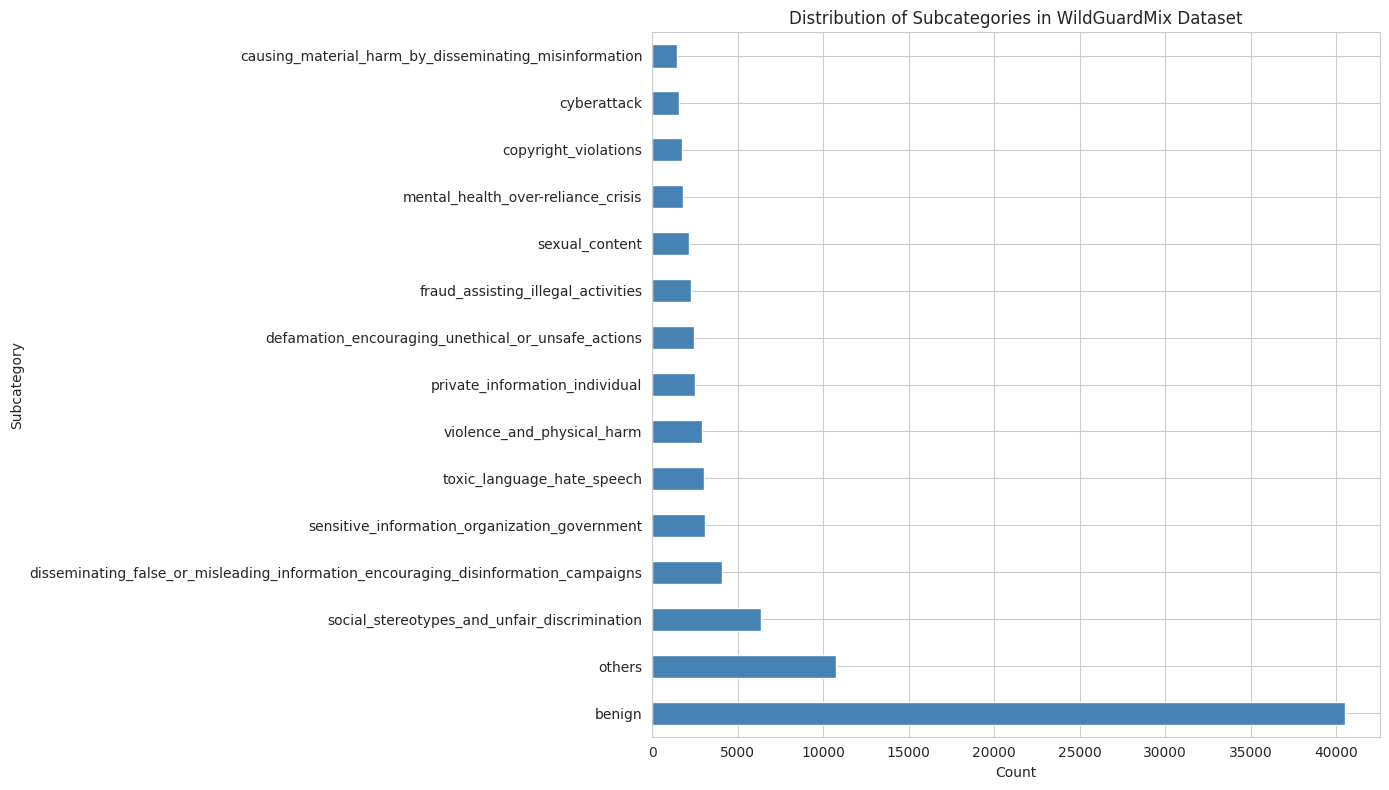

In [13]:
# Count and display subcategory distribution
subcategory_counts = df['subcategory'].value_counts()

# Visualize subcategory distribution
plt.figure(figsize=(14, 8))
subcategory_counts.plot(kind='barh', color='steelblue')
plt.xlabel('Count')
plt.ylabel('Subcategory')
plt.title('Distribution of Subcategories in WildGuardMix Dataset')
plt.tight_layout()
plt.show()

### 5.2 Response Label Distributions

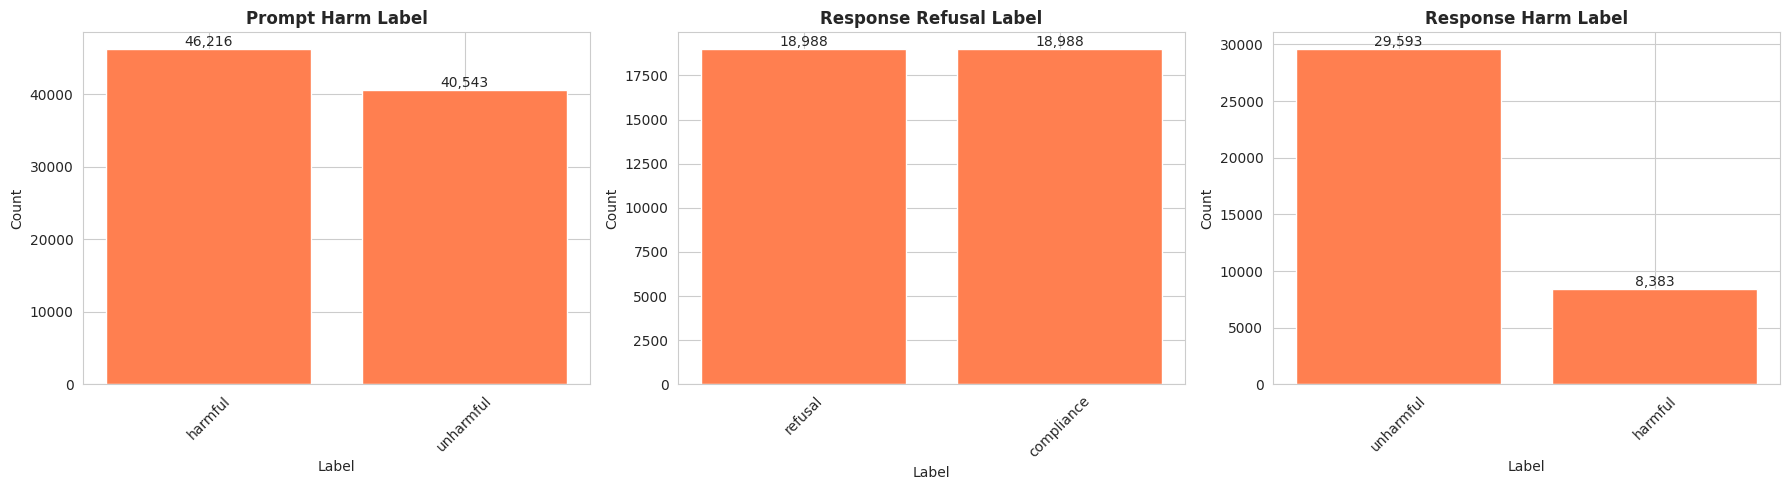

In [14]:
# Analyze all response-related labels
response_columns = ['prompt_harm_label', 'response_refusal_label', 'response_harm_label']

# Visualize response label distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, col in enumerate(response_columns):
    counts = df[col].value_counts()
    axes[idx].bar(counts.index, counts.values, color='coral')
    axes[idx].set_title(f'{col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Label')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add count labels on bars
    for i, (label, count) in enumerate(counts.items()):
        axes[idx].text(i, count, f'{count:,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 5.3 Adversarial Flag Distribution

Adversarial Flag Distribution:
adversarial
False    45803
True     40956
Name: count, dtype: int64

Percentages:
adversarial
False    52.79
True     47.21
Name: count, dtype: float64


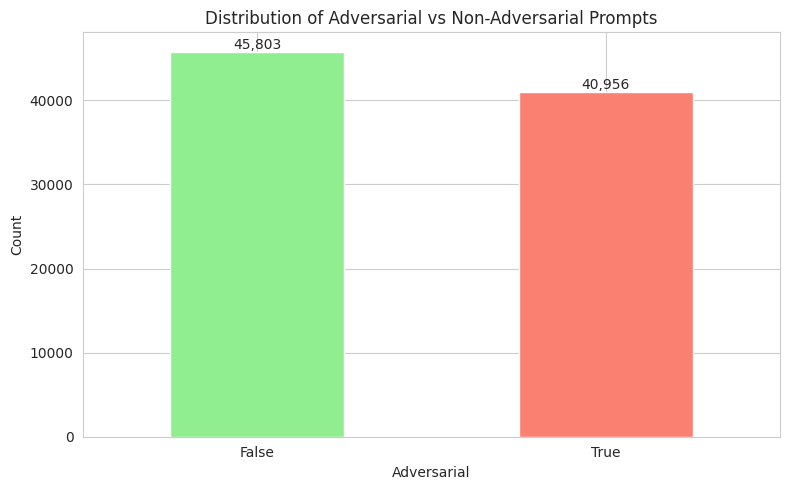

In [10]:
# Analyze adversarial flag distribution
adversarial_counts = df['adversarial'].value_counts()

print("Adversarial Flag Distribution:")
print(adversarial_counts)
print(f"\nPercentages:")
print((adversarial_counts / len(df) * 100).round(2))

# Visualize
plt.figure(figsize=(8, 5))
adversarial_counts.plot(kind='bar', color=['lightgreen', 'salmon'])
plt.xlabel('Adversarial')
plt.ylabel('Count')
plt.title('Distribution of Adversarial vs Non-Adversarial Prompts')
plt.xticks(rotation=0)
for i, count in enumerate(adversarial_counts.values):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

### 5.4 Cross-tabulation Analysis

Let's look at how different labels relate to each other.

Response Refusal vs Response Harm:
response_harm_label     harmful  unharmful    All
response_refusal_label                           
compliance                 8383      10605  18988
refusal                       0      18988  18988
All                        8383      29593  37976


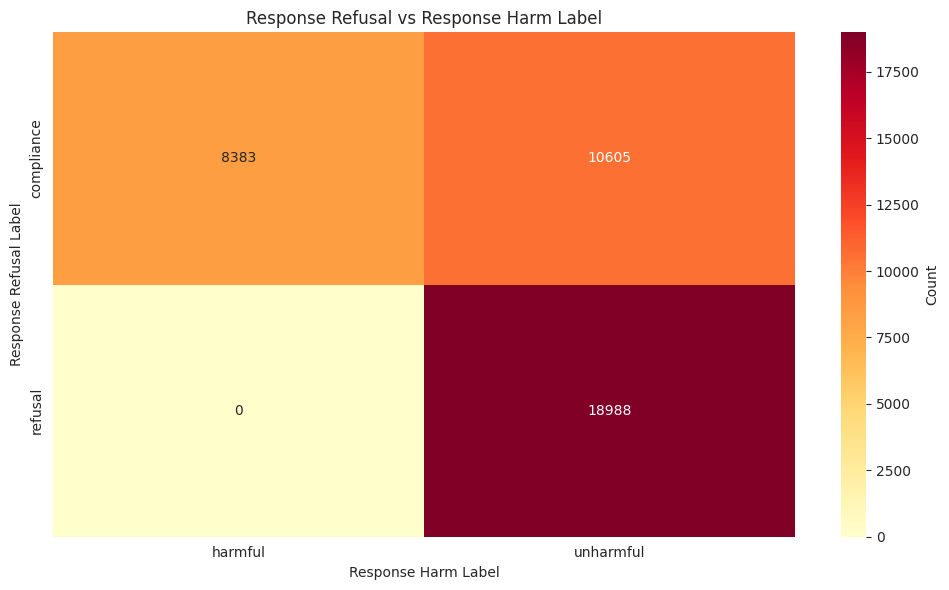

In [11]:
# Cross-tabulation: response_refusal_label vs response_harm_label
print("Response Refusal vs Response Harm:")
crosstab = pd.crosstab(df['response_refusal_label'], df['response_harm_label'], margins=True)
print(crosstab)

# Visualize as heatmap
plt.figure(figsize=(10, 6))
crosstab_no_margins = pd.crosstab(df['response_refusal_label'], df['response_harm_label'])
sns.heatmap(crosstab_no_margins, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Response Refusal vs Response Harm Label')
plt.xlabel('Response Harm Label')
plt.ylabel('Response Refusal Label')
plt.tight_layout()
plt.show()



Adversarial vs Prompt Harm Label:
prompt_harm_label  harmful  unharmful    All
adversarial                                 
False                25649      20154  45803
True                 20567      20389  40956
All                  46216      40543  86759


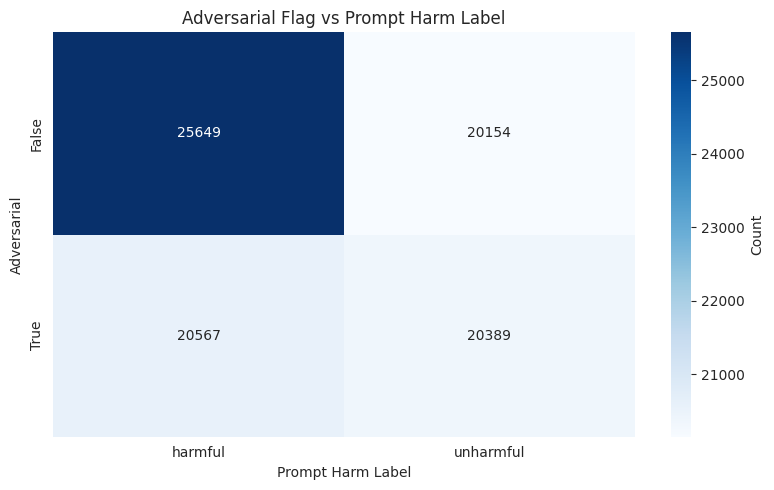

In [12]:
# Cross-tabulation: adversarial vs prompt_harm_label
print("\n\nAdversarial vs Prompt Harm Label:")
crosstab2 = pd.crosstab(df['adversarial'], df['prompt_harm_label'], margins=True)
print(crosstab2)

# Visualize as heatmap
plt.figure(figsize=(8, 5))
crosstab2_no_margins = pd.crosstab(df['adversarial'], df['prompt_harm_label'])
sns.heatmap(crosstab2_no_margins, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Adversarial Flag vs Prompt Harm Label')
plt.xlabel('Prompt Harm Label')
plt.ylabel('Adversarial')
plt.tight_layout()
plt.show()



Adversarial vs Response Harm Label:
response_harm_label  harmful  unharmful    All
adversarial                                   
False                   5236      14684  19920
True                    3147      14909  18056
All                     8383      29593  37976


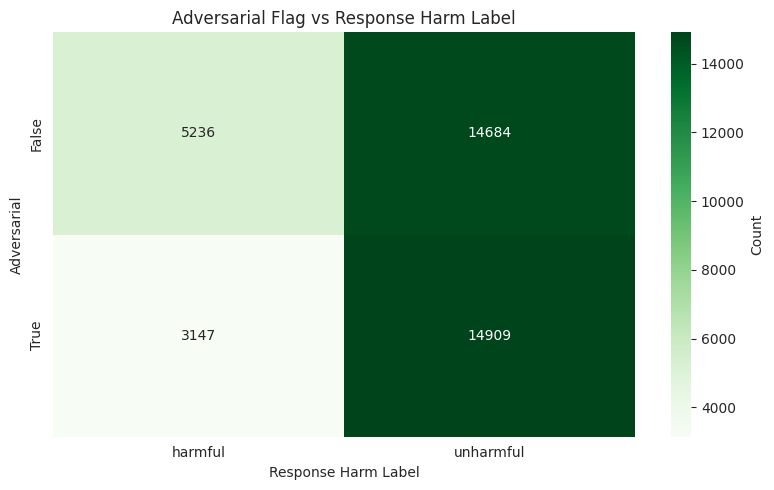

In [15]:
# Cross-tabulation: adversarial vs response_harm_label
print("\n\nAdversarial vs Response Harm Label:")
crosstab3 = pd.crosstab(df['adversarial'], df['response_harm_label'], margins=True)
print(crosstab3)

# Visualize as heatmap
plt.figure(figsize=(8, 5))
crosstab3_no_margins = pd.crosstab(df['adversarial'], df['response_harm_label'])
sns.heatmap(crosstab3_no_margins, annot=True, fmt='d', cmap='Greens', cbar_kws={'label': 'Count'})
plt.title('Adversarial Flag vs Response Harm Label')
plt.xlabel('Response Harm Label')
plt.ylabel('Adversarial')
plt.tight_layout()
plt.show()